# P1

Let's show some images from dataset.

In [32]:
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, SparsePCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

from skimage.exposure import equalize_hist
from skimage.filters import gaussian

%matplotlib inline

warnings.filterwarnings('ignore')

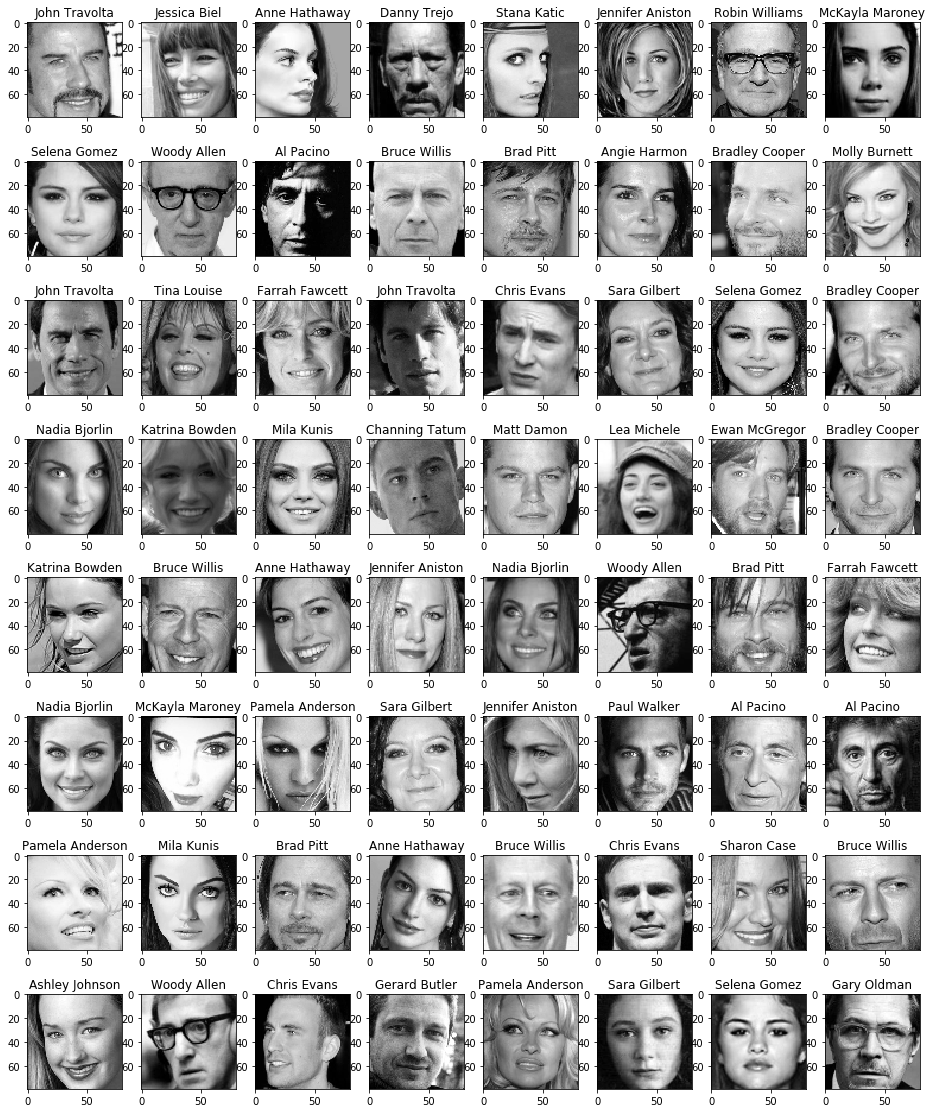

In [33]:
size = 80
shape =  2 * (size,)

X_train, y_train = shuffle(np.load('x_train.npy'), np.load('y_train.npy'))
X_test = np.load('x_test.npy')

width, height = 8, 8

plt.figure(figsize=(16, 20))
for n, (image, name) in enumerate(zip(X_train, y_train), 1):
    if n > width * height:
        break
        
    plt.subplot(height, width, n)
    plt.title(name)
    plt.imshow(image.reshape(shape), cmap='gray')

Define simple image preparing.

In [34]:
def prepare(img):
    img = img.reshape(shape)
    img = equalize_hist(img)
    img = gaussian(img, sigma=1)
    img - img.mean()
    
    return img.flatten()
    
def transform(X):
    height, width = X.shape
    for i in range(height):
        X[i] = prepare(X[i]) 
        
    return X

In [35]:
X_train = transform(X_train)
X_test = transform(X_test)

In [36]:
pca = PCA(n_components=120)
pca.fit(np.vstack([X_train, X_test]))

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
classifier = KNeighborsClassifier(n_neighbors=1, p=1.5, metric='minkowski')
classifier.fit(code_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1.5,
           weights='uniform')

In [38]:
with open('y_test.csv') as lines:
    next(lines)
    y_test = np.array(
        [line.split(',')[1].strip('"') for line in lines]
    )

In [ ]:
from sklearn.metrics import accuracy_score

y_predict = classifier.predict(pca.transform(X_test))
               
print(accuracy_score(y_test, y_predict))

In [ ]:
with open('prediction.csv', 'w') as out:
    print('Id,Name', file=out)
    for pair in enumerate(prediction, 1):
        print('%i,%s' % pair, file=out)

### 4. First model
Now you are ready to train your first model! [K-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm is very simple easy to understand, that's why we star with it. For simplicity we are going to use of skciki-learn library. First of all, read this [guide](http://scikit-learn.org/stable/modules/neighbors.html#classification) and train model. After that make your first submission to Kaggle.

In [4]:
# your code here

### 5. Why decomposition?
Read about decompostions approaches in this beatifull [guide](http://scikit-learn.org/stable/modules/decomposition.html). What is out motivation?

1. Samller dimension of the representation allows to search nearest neighbors faster.
2. Dimension reduction in some sence compress image to representation which has less noises.

Well, try use PCA or some sparce encode approach.

In [5]:
# your code here

### 6. Image preprocessing
Often the preprocessing of your data can allow you to improve the performance. In our cases pictures are very variable and noisy at the same moment. You may use bluring to remove noise or even use [histogram_equalization](https://en.wikipedia.org/wiki/Histogram_equalization). Also you can use any techniques that will come to your mind.  Perhaps the [skimage](http://scikit-image.org/) library will help you.

In [6]:
# try some preprocessing

### 7. Avoid overfitting!

Let's avoid ofervitting. Sklearn provides beautifull tools to avoid it. Please, see this [guide](http://scikit-learn.org/stable/modules/cross_validation.html). And one more thing... if you want to find optimal outer parameters of model, then why not use [this tool](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)? Good luck!

In [2]:
from skimage.exposure import equalize_adapthist, equalize_hist
from skimage.filters import gaussian
from skimage.feature import canny

def prepare(img):
#     img = img.reshape(shape)
#     img = equalize_hist(img)
#     img = gaussian(img, sigma=1)
#     img - img.mean()
    return img.flatten()
    
def transform(X):
    height, width = X.shape
    for i in range(height):
        X[i] = prepare(X[i]) 
        
    return X

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, SparsePCA
from sklearn.metrics import accuracy_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
X_train = transform(np.load('x_train.npy'))
y_train = np.load('y_train.npy')

X_test = transform(np.load('x_test.npy'))


with open('y_test.csv') as lines:
    next(lines)
    y_test = np.array(
        [line.split(',')[1].strip('"') for line in lines]
    )

In [14]:
classifier = KNeighborsClassifier(n_neighbors=1, p=1.5, metric='minkowski')
classifier.fit(X_train, y_train)
y_predict = classifier.fit(X_test)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1.5,
           weights='uniform')

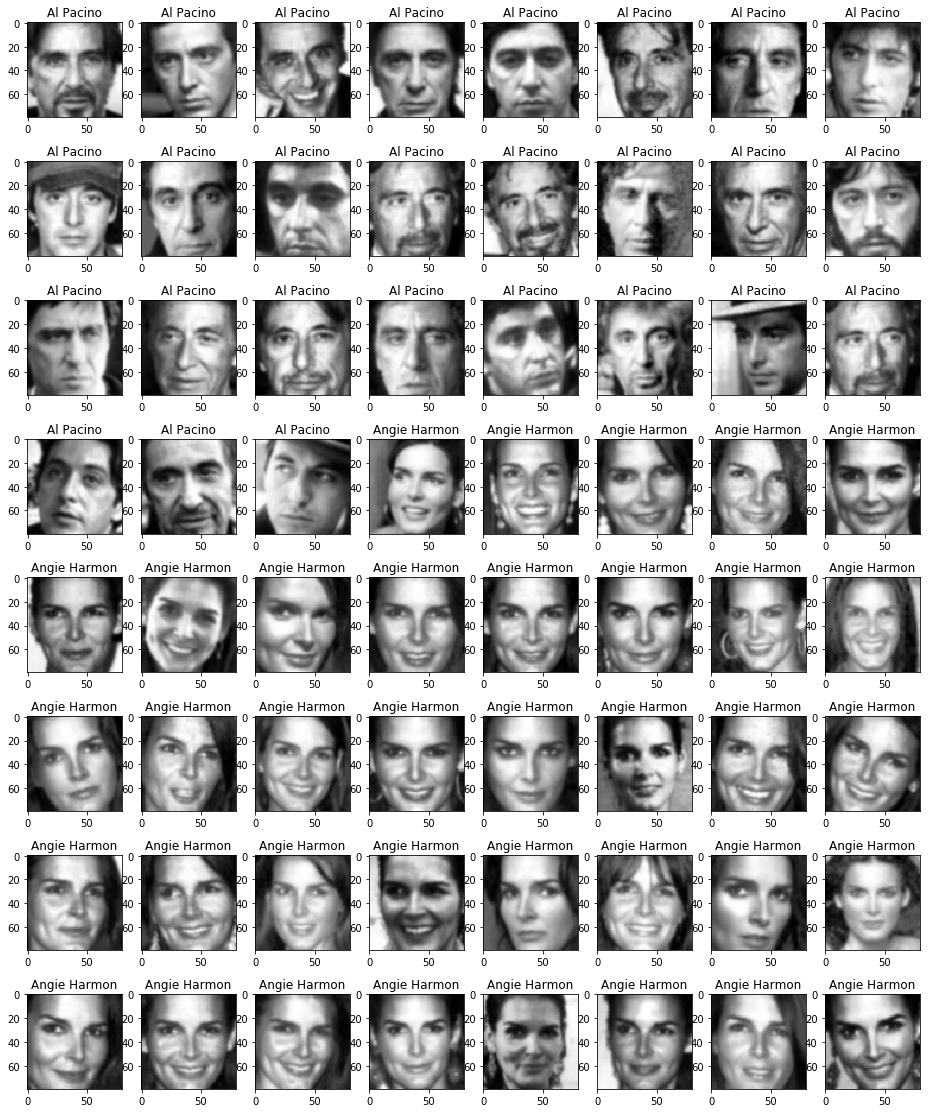

In [201]:
width, height = 8, 8

plt.figure(figsize=(16, 20))
for n, (image, name) in enumerate(zip(X_train, y_train), 1):
    if n > width * height:
        break
        
    plt.subplot(height, width, n)
    plt.title(name)
    plt.imshow(image.reshape(shape), cmap='gray')

In [ ]:
X = np.vstack(X_train)
pca = SparsePCA(n_components=200)
code = pca.fit(X)

In [ ]:
code_train = pca.transform(X_train)
code_test = pca.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1, p=1.5, metric='minkowski')
classifier.fit(code_train, y_train)

In [ ]:
prediction = classifier.predict(code_test)

accuracy = (prediction == y_test).sum() / y_test.size
print(accuracy)

In [193]:
with open('prediction.csv', 'w') as out:
    print('Id,Name', file=out)
    for pair in enumerate(prediction, 1):
        print('%i,%s' % pair, file=out)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1, p=1.5, metric='minkowski')
classifier.fit(code_train, y_train)

In [ ]:
print('h')

In [6]:
pca = PCA(n_components=120)
pca.fit(X_train)

classifier = KNeighborsClassifier(n_neighbors=1, p=1.5, metric='minkowski')
classifier.fit(pca.transform(X_train), y_train)
y_predict = classifier.predict(pca.transform(X_test))
               
print(accuracy_score(y_test, y_predict))

0.35472972973


In [7]:
classifier = KNeighborsClassifier(n_neighbors=1, p=1.5, metric='minkowski')
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

print(accuracy_score(y_test, y_predict))

0.342905405405
